In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
filepath = 'D:/OneDrive - Infosys Limited/Local_D/Alankrita_Knowledge Learning/Alankrita_Knowledge Learning/Analytics India Magazine/Hiring Hackathon/Participants_Data_TGIH/Participants_Data_TGIH'
filepath+"/Train.csv"

'D:/OneDrive - Infosys Limited/Local_D/Alankrita_Knowledge Learning/Alankrita_Knowledge Learning/Analytics India Magazine/Hiring Hackathon/Participants_Data_TGIH/Participants_Data_TGIH/Train.csv'

In [3]:
train_data = pd.read_csv(filepath+"/Train.csv")

In [4]:
train_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [5]:
train_data.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


In [7]:
train_data.dtypes

InvoiceNo        int64
StockCode        int64
Description      int64
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country          int64
dtype: object

#### <font color= green> *Separating the Invoice Date into Day, Month, Year, Month-Year columns* </font>

In [8]:
df = pd.DataFrame()
df['InvoiceDate'] = train_data['InvoiceDate']
df['InvDate'] = pd.to_datetime(df['InvoiceDate']).dt.date
df['InvTime'] = pd.to_datetime(df['InvoiceDate']).dt.time
df['InvDate'] = pd.to_datetime(df['InvDate'])
df['Year'] = df['InvDate'].dt.year
df['Month'] = df['InvDate'].dt.month
df['Day'] = df['InvDate'].dt.day
df

,InvoiceDate,InvDate,InvTime,Year,Month,Day
0,2011-05-06 16:54:00,2011-05-06,16:54:00,2011,5,6
1,2011-05-11 07:35:00,2011-05-11,07:35:00,2011,5,11
2,2011-11-20 13:20:00,2011-11-20,13:20:00,2011,11,20
3,2011-11-22 12:07:00,2011-11-22,12:07:00,2011,11,22
4,2011-05-06 09:00:00,2011-05-06,09:00:00,2011,5,6
...,...,...,...,...,...,...
284775,2011-03-01 12:07:00,2011-03-01,12:07:00,2011,3,1
284776,2011-10-13 15:08:00,2011-10-13,15:08:00,2011,10,13
284777,2011-05-16 12:59:00,2011-05-16,12:59:00,2011,5,16
284778,2011-10-11 14:18:00,2011-10-11,14:18:00,2011,10,11


In [9]:
df['YearMonth'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))
df

,InvoiceDate,InvDate,InvTime,Year,Month,Day,YearMonth
0,2011-05-06 16:54:00,2011-05-06,16:54:00,2011,5,6,2011-05-01
1,2011-05-11 07:35:00,2011-05-11,07:35:00,2011,5,11,2011-05-01
2,2011-11-20 13:20:00,2011-11-20,13:20:00,2011,11,20,2011-11-01
3,2011-11-22 12:07:00,2011-11-22,12:07:00,2011,11,22,2011-11-01
4,2011-05-06 09:00:00,2011-05-06,09:00:00,2011,5,6,2011-05-01
...,...,...,...,...,...,...,...
284775,2011-03-01 12:07:00,2011-03-01,12:07:00,2011,3,1,2011-03-01
284776,2011-10-13 15:08:00,2011-10-13,15:08:00,2011,10,13,2011-10-01
284777,2011-05-16 12:59:00,2011-05-16,12:59:00,2011,5,16,2011-05-01
284778,2011-10-11 14:18:00,2011-10-11,14:18:00,2011,10,11,2011-10-01


In [10]:
tr_updated = train_data.join(df[['InvDate','InvTime','Year','Month','Day','YearMonth']])

In [33]:
print("Train Data Shape:", train_data.shape)
print("Date Df Shape:", df.shape)
print("Combined Data Shape:",tr_updated.shape)

Train Data Shape: (284780, 8)
Date Df Shape: (284780, 7)
Combined Data Shape: (284780, 14)


In [31]:
tr_updated.dtypes

InvoiceNo               int64
StockCode               int64
Description             int64
Quantity                int64
InvoiceDate            object
UnitPrice             float64
CustomerID            float64
Country                 int64
InvDate        datetime64[ns]
InvTime                object
Year                    int64
Month                   int64
Day                     int64
YearMonth      datetime64[ns]
dtype: object

In [19]:
tr_cor= tr_updated.corr()

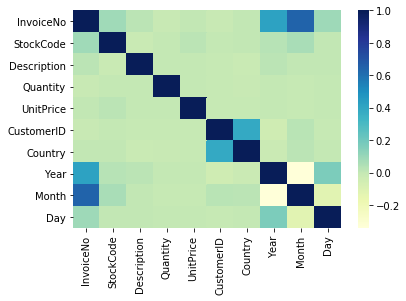

In [20]:
sns.heatmap(tr_cor, cmap="YlGnBu")

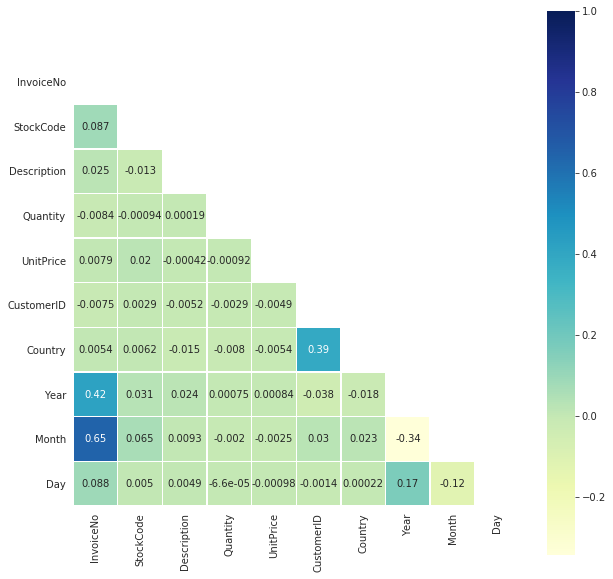

In [30]:
mask = np.zeros_like(tr_cor)
mask[np.triu_indices_from(mask)]= True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(tr_cor,annot=True, mask = mask,cmap="YlGnBu",square = True,linewidths=.5)
    

#### <font color = red> **Conclusion: No definitive strong correlation observed in the dataset**</font>

#### <font color = green> *distinct value in each column* </font>

In [42]:
print("Distinct number of InvoiceNumber:", tr_updated['InvoiceNo'].nunique())
print("Distinct number of StockCodes:", tr_updated['StockCode'].nunique())
print("Distinct number of Description:", tr_updated['Description'].nunique())
print("Distinct number of Quantity:", tr_updated['Quantity'].nunique())
print("Distinct number of Customer IDs:", tr_updated['CustomerID'].nunique())
print("Distinct number of Countries:", tr_updated['Country'].nunique())
print("Distinct number of InvDate:", tr_updated['InvDate'].nunique())
print("Distinct number of YearMonth:", tr_updated['YearMonth'].nunique())

Distinct number of InvoiceNumber: 20971
Distinct number of StockCodes: 3619
Distinct number of Description: 3819
Distinct number of Quantity: 373
Distinct number of Customer IDs: 4339
Distinct number of Countries: 37
Distinct number of InvDate: 305
Distinct number of YearMonth: 13


In [53]:
np.sort(pd.unique(tr_updated['YearMonth']))

array(['2010-12-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

#### <font color = red>**only 13 months data from Dec 2010 to Dec 2011**</font>

In [55]:
tr_1 = tr_updated.groupby('YearMonth').agg({'InvDate':'nunique', 'CustomerID':'nunique','InvoiceNo':'nunique','UnitPrice':['max','min','sum','nunique']})
tr_1

InvDate CustomerID InvoiceNo UnitPrice                          
           nunique    nunique   nunique       max   min         sum nunique
YearMonth                                                                  
2010-12-01      20        921      1591    295.00  0.00   60309.110     129
2011-01-01      24        763      1167   1715.85  0.00   51362.970     122
2011-02-01      24        777      1133    320.69  0.06   46522.490     120
2011-03-01      27        994      1526   1687.17  0.00   66292.840     160
2011-04-01      21        886      1291   2382.92  0.00   61228.571     139
2011-05-01      25       1060      1724   8142.75  0.00   79160.680     164
2011-06-01      26       1030      1613  38970.00  0.04  102385.210     161
2011-07-01      26        977      1508   3060.60  0.00   64243.631     167
2011-08-01      26        959      1462   3155.95  0.00   59668.270     159
2011-09-01      26       1280      1980    688.08  0.00   83841.202     198
2011-10-01      26       1406      2151   4161.06  0.00  132638.550     226
2011-11-01      26       1687      2943   1526.76  0.00  138946.730     236
2011-12-01       8        671       882   1599.26  0.04   36237.010     164

In [58]:
tr_11 = pd.DataFrame(tr_1)
tr_11.dtypes

InvDate     nunique      int64
CustomerID  nunique      int64
InvoiceNo   nunique      int64
UnitPrice   max        float64
            min        float64
            sum        float64
            nunique      int64
dtype: object

In [60]:
type(tr_1)

pandas.core.frame.DataFrame

In [64]:
tr_1.index

DatetimeIndex(['2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01',
               '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01',
               '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01',
               '2011-12-01'],
              dtype='datetime64[ns]', name='YearMonth', freq=None)

In [69]:
tr_1 = tr_1.reset_index()

In [70]:
tr_1

YearMonth InvDate CustomerID InvoiceNo UnitPrice                          
              nunique    nunique   nunique       max   min         sum nunique
0  2010-12-01      20        921      1591    295.00  0.00   60309.110     129
1  2011-01-01      24        763      1167   1715.85  0.00   51362.970     122
2  2011-02-01      24        777      1133    320.69  0.06   46522.490     120
3  2011-03-01      27        994      1526   1687.17  0.00   66292.840     160
4  2011-04-01      21        886      1291   2382.92  0.00   61228.571     139
5  2011-05-01      25       1060      1724   8142.75  0.00   79160.680     164
6  2011-06-01      26       1030      1613  38970.00  0.04  102385.210     161
7  2011-07-01      26        977      1508   3060.60  0.00   64243.631     167
8  2011-08-01      26        959      1462   3155.95  0.00   59668.270     159
9  2011-09-01      26       1280      1980    688.08  0.00   83841.202     198
10 2011-10-01      26       1406      2151   4161.06  0.00  132638.550     226
11 2011-11-01      26       1687      2943   1526.76  0.00  138946.730     236
12 2011-12-01       8        671       882   1599.26  0.04   36237.010     164

In [72]:
tr_1.columns

MultiIndex([( 'YearMonth',        ''),
            (   'InvDate', 'nunique'),
            ('CustomerID', 'nunique'),
            ( 'InvoiceNo', 'nunique'),
            ( 'UnitPrice',     'max'),
            ( 'UnitPrice',     'min'),
            ( 'UnitPrice',     'sum'),
            ( 'UnitPrice', 'nunique')],
           )

In [75]:
tr_1['InvDate','nunique']

0     20
1     24
2     24
3     27
4     21
5     25
6     26
7     26
8     26
9     26
10    26
11    26
12     8
Name: (InvDate, nunique), dtype: int64

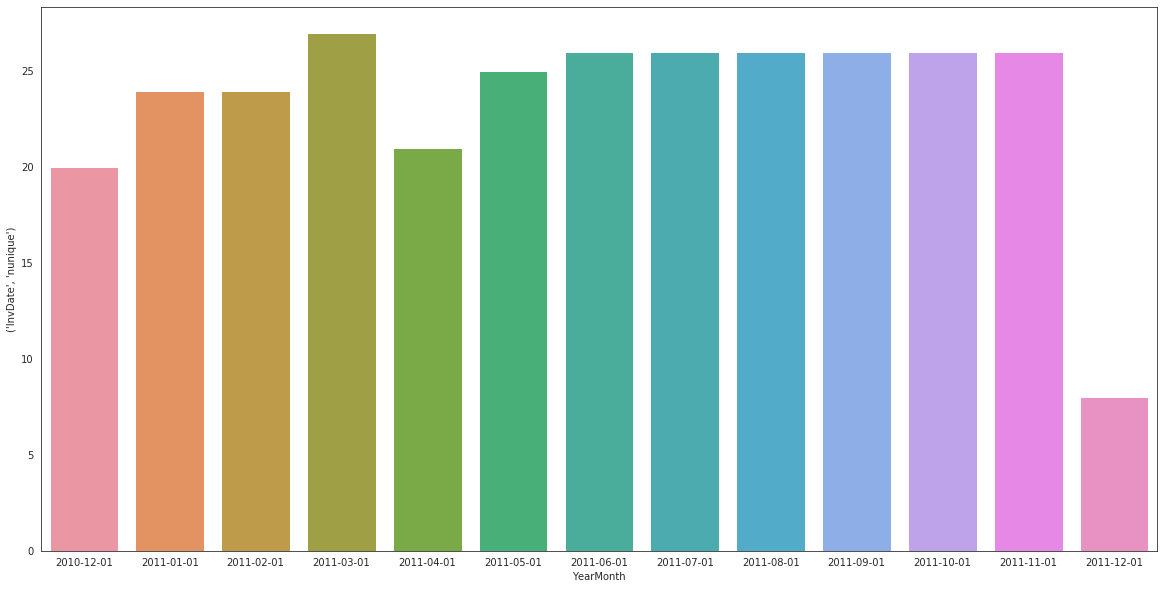

In [101]:
x = tr_1['YearMonth'].dt.date
y = tr_1['InvDate','nunique']
data = pd.DataFrame(x,y)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 10))
    ax = sns.barplot(x,y,data= data)

#### <font color = red>**May to Nov2011 has uniform purchases**</font>

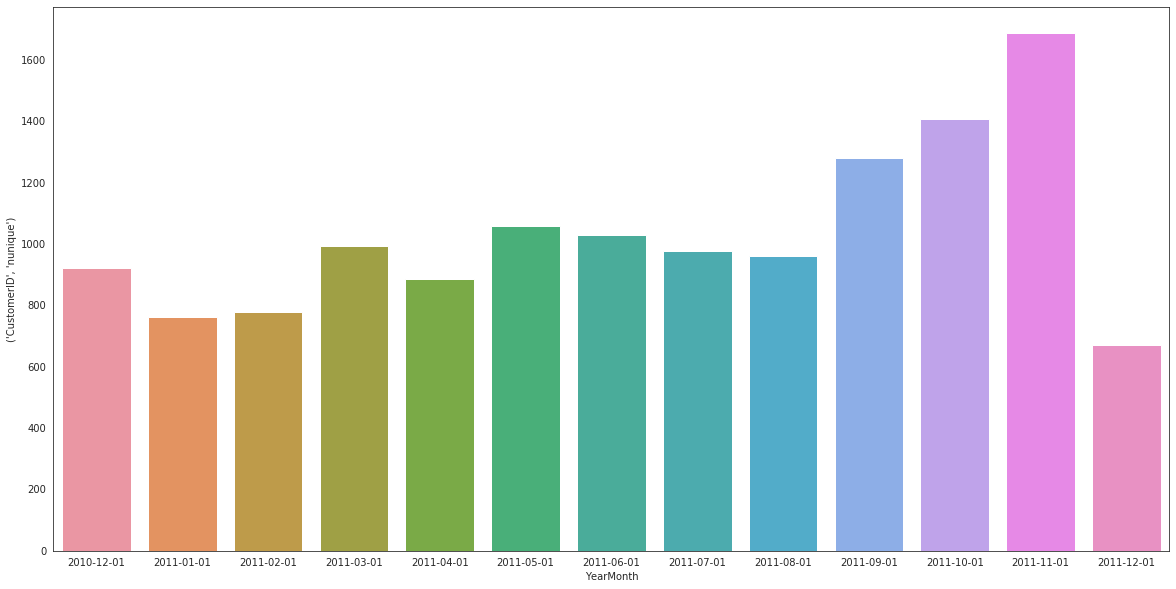

In [102]:
x = tr_1['YearMonth'].dt.date
y = tr_1['CustomerID','nunique']
data = pd.DataFrame(x,y)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 10))
    ax = sns.barplot(x,y,data= data)

#### <font color = red> **From Dec to Mar, Sept to Nov there is an Increase**<font>
#### <font color = red> **From May to Aug drop in customers** </font>

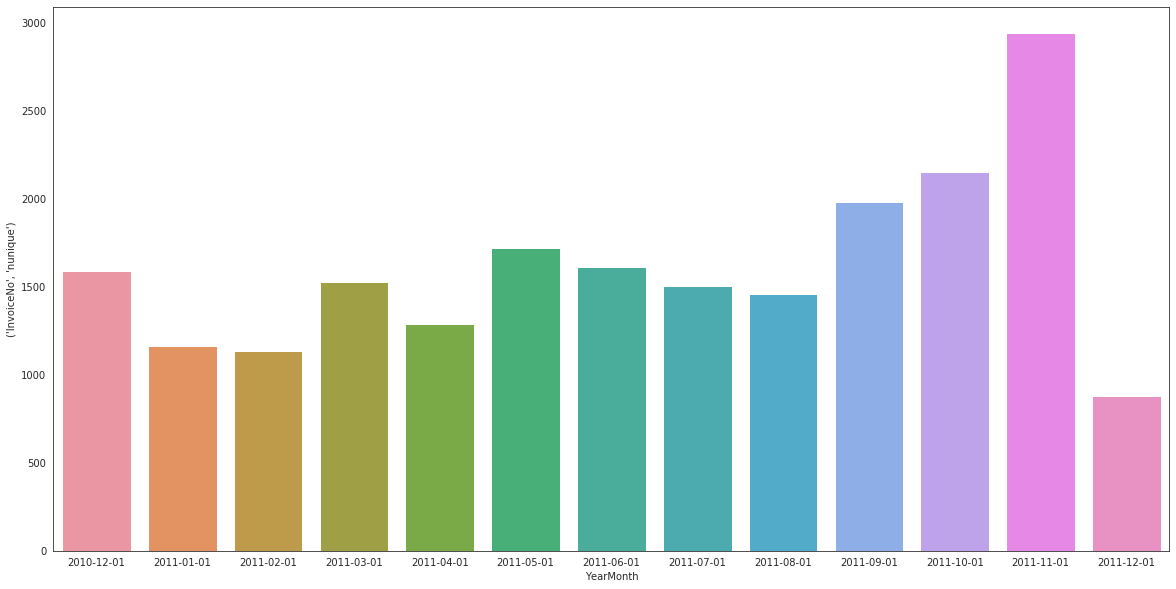

In [130]:
x = pd.to_datetime(tr_1['YearMonth']).dt.date
y = tr_1['InvoiceNo','nunique']
data = pd.DataFrame(x,y)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 10))
    ax = sns.barplot( x,y,data= data)

In [154]:
tr_2 = tr_updated.groupby(['StockCode','Description','YearMonth']).agg({'CustomerID':'nunique','InvoiceNo':'nunique','Quantity':['min','max','sum','mean','nunique'],'UnitPrice':['max','min','sum','mean','nunique']})
tr_2 = tr_2.reset_index()
tr_2

StockCode Description  YearMonth CustomerID InvoiceNo Quantity       \
                                          nunique   nunique      min  max   
0             0        1698 2010-12-01          9        10        1   48   
1             0        1698 2011-01-01         13        13        1   60   
2             0        1698 2011-02-01          1         1       12   12   
3             0        1698 2011-03-01          4         4        2    6   
4             0        1698 2011-04-01          4         4        1  120   
...         ...         ...        ...        ...       ...      ...  ...   
28970      3683        2624 2011-08-01         62        71       -1    9   
28971      3683        2624 2011-09-01         74        80       -1   11   
28972      3683        2624 2011-10-01         74        87       -1   10   
28973      3683        2624 2011-11-01        103       135       -2    8   
28974      3683        2624 2011-12-01         33        38       -1    7   

                              UnitPrice                                    
       sum       mean nunique       max   min      sum       mean nunique  
0      174  17.400000       8      0.85  0.85     8.50   0.850000       1  
1      184  14.153846       8      0.85  0.85    11.05   0.850000       1  
2       12  12.000000       1      0.85  0.85     0.85   0.850000       1  
3       19   4.750000       3      0.85  0.85     3.40   0.850000       1  
4      185  46.250000       4      0.85  0.85     3.40   0.850000       1  
...    ...        ...     ...       ...   ...      ...        ...     ...  
28970  174   2.450704      10     40.00  4.41  1456.52  20.514366       7  
28971  195   2.437500       9    200.00  4.50  1790.12  22.376500       9  
28972  230   2.643678      11    240.00  3.95  2135.37  24.544483      10  
28973  320   2.370370      10    262.73  1.00  3145.94  23.303259      14  
28974   97   2.552632       7    240.00  1.00  1000.50  26.328947       9  

[28975 rows x 15 columns]

In [142]:
tr_3 = tr_updated.groupby(['StockCode','Description']).agg({'YearMonth':'nunique','CustomerID':'nunique','InvoiceNo':'nunique','Quantity':['min','max','sum','nunique'],'UnitPrice':['max','min','sum','nunique']})
#tr_2_2.count()
tr_3.reset_index()
tr_3

YearMonth CustomerID InvoiceNo Quantity              \
                        nunique    nunique   nunique      min   max   sum   
StockCode Description                                                       
0         1698                5         27        32        1   120   574   
1         1536                6         14        14        2    26   190   
2         985                 9         18        22        1    30   129   
3         1632                2          3         3        1     3     5   
4         3336                4          4         4        1     4    12   
...                         ...        ...       ...      ...   ...   ...   
3679      1066               13         19        46     -720    -1  -927   
3680      1043                5          1        14        1     1    14   
3681      2140               13        210       291    -1350  1600  2124   
3682      2285                3          4         4        1     1     4   
3683      2624               13        331       839       -3    16  2104   

                               UnitPrice                             
                      nunique        max    min         sum nunique  
StockCode Description                                                
0         1698             15      0.850   0.85      27.200       1  
1         1536              5      0.850   0.39       5.920       2  
2         985              10      0.210   0.21       4.830       1  
3         1632              2      0.650   0.65       1.950       1  
4         3336              3      0.420   0.42       1.680       1  
...                       ...        ...    ...         ...     ...  
3679      1066              5   1867.860   0.01    4292.730      49  
3680      1043              1   1599.260  11.17   10942.230      14  
3681      2140             43  38970.000   0.00  107096.470     145  
3682      2285              1      0.001   0.00       0.003       2  
3683      2624             15   8142.750   1.00   27902.050      55  

[3837 rows x 11 columns]

In [144]:
tr_3.reset_index()

StockCode Description YearMonth CustomerID InvoiceNo Quantity        \
                             nunique    nunique   nunique      min   max   
0            0        1698         5         27        32        1   120   
1            1        1536         6         14        14        2    26   
2            2         985         9         18        22        1    30   
3            3        1632         2          3         3        1     3   
4            4        3336         4          4         4        1     4   
...        ...         ...       ...        ...       ...      ...   ...   
3832      3679        1066        13         19        46     -720    -1   
3833      3680        1043         5          1        14        1     1   
3834      3681        2140        13        210       291    -1350  1600   
3835      3682        2285         3          4         4        1     1   
3836      3683        2624        13        331       839       -3    16   

                    UnitPrice                             
       sum nunique        max    min         sum nunique  
0      574      15      0.850   0.85      27.200       1  
1      190       5      0.850   0.39       5.920       2  
2      129      10      0.210   0.21       4.830       1  
3        5       2      0.650   0.65       1.950       1  
4       12       3      0.420   0.42       1.680       1  
...    ...     ...        ...    ...         ...     ...  
3832  -927       5   1867.860   0.01    4292.730      49  
3833    14       1   1599.260  11.17   10942.230      14  
3834  2124      43  38970.000   0.00  107096.470     145  
3835     4       1      0.001   0.00       0.003       2  
3836  2104      15   8142.750   1.00   27902.050      55  

[3837 rows x 13 columns]

In [148]:
def f(row):
    if (row['InvoiceNo','nunique']/row['CustomerID','nunique']) ==1:
        val = 0
    elif (row['InvoiceNo','nunique']/row['CustomerID','nunique'])>1:
        val = 1
    else:
        val = 0
    return val


tr_4 = tr_3
tr_4['RepeatCustPurchase']= tr_4.apply(f,axis=1)
tr_4

YearMonth CustomerID InvoiceNo Quantity              \
                        nunique    nunique   nunique      min   max   sum   
StockCode Description                                                       
0         1698                5         27        32        1   120   574   
1         1536                6         14        14        2    26   190   
2         985                 9         18        22        1    30   129   
3         1632                2          3         3        1     3     5   
4         3336                4          4         4        1     4    12   
...                         ...        ...       ...      ...   ...   ...   
3679      1066               13         19        46     -720    -1  -927   
3680      1043                5          1        14        1     1    14   
3681      2140               13        210       291    -1350  1600  2124   
3682      2285                3          4         4        1     1     4   
3683      2624               13        331       839       -3    16  2104   

                               UnitPrice                             \
                      nunique        max    min         sum nunique   
StockCode Description                                                 
0         1698             15      0.850   0.85      27.200       1   
1         1536              5      0.850   0.39       5.920       2   
2         985              10      0.210   0.21       4.830       1   
3         1632              2      0.650   0.65       1.950       1   
4         3336              3      0.420   0.42       1.680       1   
...                       ...        ...    ...         ...     ...   
3679      1066              5   1867.860   0.01    4292.730      49   
3680      1043              1   1599.260  11.17   10942.230      14   
3681      2140             43  38970.000   0.00  107096.470     145   
3682      2285              1      0.001   0.00       0.003       2   
3683      2624             15   8142.750   1.00   27902.050      55   

                      RepeatCust RepeatCustPurchase  
                                                     
StockCode Description                                
0         1698                 1                  1  
1         1536                 0                  0  
2         985                  1                  1  
3         1632                 0                  0  
4         3336                 0                  0  
...                          ...                ...  
3679      1066                 1                  1  
3680      1043                 1                  1  
3681      2140                 1                  1  
3682      2285                 0                  0  
3683      2624                 1                  1  

[3837 rows x 13 columns]

In [149]:
del tr_4['RepeatCust']
tr_4

YearMonth CustomerID InvoiceNo Quantity              \
                        nunique    nunique   nunique      min   max   sum   
StockCode Description                                                       
0         1698                5         27        32        1   120   574   
1         1536                6         14        14        2    26   190   
2         985                 9         18        22        1    30   129   
3         1632                2          3         3        1     3     5   
4         3336                4          4         4        1     4    12   
...                         ...        ...       ...      ...   ...   ...   
3679      1066               13         19        46     -720    -1  -927   
3680      1043                5          1        14        1     1    14   
3681      2140               13        210       291    -1350  1600  2124   
3682      2285                3          4         4        1     1     4   
3683      2624               13        331       839       -3    16  2104   

                               UnitPrice                             \
                      nunique        max    min         sum nunique   
StockCode Description                                                 
0         1698             15      0.850   0.85      27.200       1   
1         1536              5      0.850   0.39       5.920       2   
2         985              10      0.210   0.21       4.830       1   
3         1632              2      0.650   0.65       1.950       1   
4         3336              3      0.420   0.42       1.680       1   
...                       ...        ...    ...         ...     ...   
3679      1066              5   1867.860   0.01    4292.730      49   
3680      1043              1   1599.260  11.17   10942.230      14   
3681      2140             43  38970.000   0.00  107096.470     145   
3682      2285              1      0.001   0.00       0.003       2   
3683      2624             15   8142.750   1.00   27902.050      55   

                      RepeatCustPurchase  
                                          
StockCode Description                     
0         1698                         1  
1         1536                         0  
2         985                          1  
3         1632                         0  
4         3336                         0  
...                                  ...  
3679      1066                         1  
3680      1043                         1  
3681      2140                         1  
3682      2285                         0  
3683      2624                         1  

[3837 rows x 12 columns]

In [153]:
print("StockCode freq of Purchase: Minimum", tr_4['YearMonth','nunique'].min())
print("StockCode freq of Purchase: Maximum", tr_4['YearMonth','nunique'].max())
print("StockCode freq of Purchase: Average", tr_4['YearMonth','nunique'].mean())

StockCode freq of Purchase: Minimum 1
StockCode freq of Purchase: Maximum 13
StockCode freq of Purchase: Average 7.551472504560855


In [155]:
def f2(row):
    if (row['YearMonth','nunique']) > 7:
        val = 1
    else:
        val = 0
    return val

tr_4['FreqPurchased']= tr_4.apply(f2,axis=1)
tr_4

YearMonth CustomerID InvoiceNo Quantity              \
                        nunique    nunique   nunique      min   max   sum   
StockCode Description                                                       
0         1698                5         27        32        1   120   574   
1         1536                6         14        14        2    26   190   
2         985                 9         18        22        1    30   129   
3         1632                2          3         3        1     3     5   
4         3336                4          4         4        1     4    12   
...                         ...        ...       ...      ...   ...   ...   
3679      1066               13         19        46     -720    -1  -927   
3680      1043                5          1        14        1     1    14   
3681      2140               13        210       291    -1350  1600  2124   
3682      2285                3          4         4        1     1     4   
3683      2624               13        331       839       -3    16  2104   

                               UnitPrice                             \
                      nunique        max    min         sum nunique   
StockCode Description                                                 
0         1698             15      0.850   0.85      27.200       1   
1         1536              5      0.850   0.39       5.920       2   
2         985              10      0.210   0.21       4.830       1   
3         1632              2      0.650   0.65       1.950       1   
4         3336              3      0.420   0.42       1.680       1   
...                       ...        ...    ...         ...     ...   
3679      1066              5   1867.860   0.01    4292.730      49   
3680      1043              1   1599.260  11.17   10942.230      14   
3681      2140             43  38970.000   0.00  107096.470     145   
3682      2285              1      0.001   0.00       0.003       2   
3683      2624             15   8142.750   1.00   27902.050      55   

                      RepeatCustPurchase FreqPurchased  
                                                        
StockCode Description                                   
0         1698                         1             0  
1         1536                         0             0  
2         985                          1             1  
3         1632                         0             0  
4         3336                         0             0  
...                                  ...           ...  
3679      1066                         1             1  
3680      1043                         1             0  
3681      2140                         1             1  
3682      2285                         0             0  
3683      2624                         1             1  

[3837 rows x 13 columns]

In [157]:
print("StockCode Unit Price changes: Minimum", tr_4['UnitPrice','nunique'].min())
print("StockCode Unit Price changes: Maximum", tr_4['UnitPrice','nunique'].max())
print("StockCode Unit Price changes: Average", tr_4['UnitPrice','nunique'].mean())
print("StockCode Different Unit Price Change Combination", tr_4['UnitPrice','nunique'].nunique())

StockCode Unit Price changes: Minimum 1
StockCode Unit Price changes: Maximum 145
StockCode Unit Price changes: Average 2.2337763878029713
StockCode Different Unit Price Change Combination 15


In [162]:
tr_4['UnitPrice','nunique'].value_counts()

2      1305
1      1267
3       868
4       260
5        64
6        36
7        23
8         5
9         3
145       1
55        1
49        1
11        1
14        1
12        1
Name: (UnitPrice, nunique), dtype: int64

In [167]:
print("Repeat Customer Purchase : \n", tr_4['RepeatCustPurchase'].value_counts())

print ("\nFrequently bought StockCodes:\n", tr_4['FreqPurchased'].value_counts())

Repeat Customer Purchase : 
 1    2798
0    1039
Name: RepeatCustPurchase, dtype: int64

Frequently bought StockCodes:
 0    1927
1    1910
Name: FreqPurchased, dtype: int64


In [169]:
print("StockCode Quantity changes: Minimum", tr_4['Quantity','nunique'].min())
print("\nStockCode Quantity changes: Maximum", tr_4['Quantity','nunique'].max())
print("\nStockCode Quantity changes: Average", tr_4['Quantity','nunique'].mean())
print("\nStockCode Different Quantity Change Combination", tr_4['Quantity','nunique'].nunique())
print("\nStockCode Different Quantity counts\n", tr_4['Quantity','nunique'].value_counts())

StockCode Quantity changes: Minimum 1

StockCode Quantity changes: Maximum 58

StockCode Quantity changes: Average 8.669794109981757

StockCode Different Quantity Change Combination 44

StockCode Different Quantity counts
 1     354
2     305
3     273
4     259
5     253
6     247
7     236
8     230
9     207
10    206
11    189
12    160
13    151
14    116
15    109
16     91
17     77
18     65
19     62
20     52
21     41
22     37
23     22
26     18
24     18
25     18
28     10
35      4
29      4
27      4
36      3
33      3
31      2
49      1
30      1
32      1
34      1
38      1
46      1
48      1
43      1
58      1
37      1
52      1
Name: (Quantity, nunique), dtype: int64


In [170]:
tr_4[tr_4['Quantity','nunique']<=8].count()

YearMonth           nunique    2157
CustomerID          nunique    2157
InvoiceNo           nunique    2157
Quantity            min        2157
                    max        2157
                    sum        2157
                    nunique    2157
UnitPrice           max        2157
                    min        2157
                    sum        2157
                    nunique    2157
RepeatCustPurchase             2157
FreqPurchased                  2157
dtype: int64

In [184]:
tr_4[tr_4['Quantity','nunique']>8].count()

YearMonth           nunique    1680
CustomerID          nunique    1680
InvoiceNo           nunique    1680
Quantity            min        1680
                    max        1680
                    sum        1680
                    nunique    1680
UnitPrice           max        1680
                    min        1680
                    sum        1680
                    nunique    1680
RepeatCustPurchase             1680
FreqPurchased                  1680
dtype: int64

In [185]:
tr_4.columns

MultiIndex([(         'YearMonth', 'nunique'),
            (        'CustomerID', 'nunique'),
            (         'InvoiceNo', 'nunique'),
            (          'Quantity',     'min'),
            (          'Quantity',     'max'),
            (          'Quantity',     'sum'),
            (          'Quantity', 'nunique'),
            (         'UnitPrice',     'max'),
            (         'UnitPrice',     'min'),
            (         'UnitPrice',     'sum'),
            (         'UnitPrice', 'nunique'),
            ('RepeatCustPurchase',        ''),
            (     'FreqPurchased',        '')],
           )

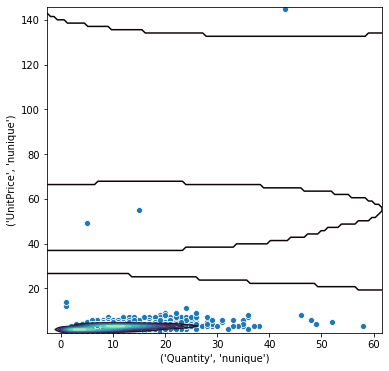

In [221]:
x = tr_4['Quantity','nunique']
x = x.reset_index()
x = x['Quantity','nunique']
y = tr_4['UnitPrice','nunique']
y = y.reset_index()
y = y['UnitPrice','nunique']
data = pd.DataFrame(x,y)
#data.dtypes
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x,y)
sns.kdeplot(x,y, cmap="mako")

In [209]:
x = x.reset_index()

In [210]:
x.index

RangeIndex(start=0, stop=3837, step=1)

In [212]:
x['Quantity']['nunique']

0       15
1        5
2       10
3        2
4        3
        ..
3832     5
3833     1
3834    43
3835     1
3836    15
Name: nunique, Length: 3837, dtype: int64